## STAT 207 Lab 6: Central Limit Theorem and Confidence Intervals - [25 total points] - Solutions

Due: Wednesday, March 17 11:59pm CST <font color='green'>Happy St. Patrick's Day!</font>



## <u>Case Study</u>: U.S. County Home Ownership
In this lab we will explore the statistical concepts that we've learned this week while also examining the **homeownership rates** of the counties in the U.S. 

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 1. <u>Preliminaries</u>

### 1a. [0.5 pt] Read the county.csv into a dataframe, call it df, and display the first five rows.

Remember that 'data unavailable' represents missing values in this csv. Make sure you encode these values as NaN when you read the data in.

In [3]:
df = pd.read_csv("county.csv")
df = df.replace('data unavailable','NaN')
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671,54571,55504,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.7,55317,none
1,Baldwin County,Alabama,140415,182265,212628,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562,none
2,Barbour County,Alabama,29038,27457,25270,-6.22,27.2,68.0,11.1,5.9,no,hs_diploma,17891.73,33368,partial
3,Bibb County,Alabama,20826,22915,22668,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404,none
4,Blount County,Alabama,51024,57322,58013,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412,none


### 1b. [0.5pt] Display the shape of the dataframe.

In [4]:
df.shape

(3142, 15)

### 1.c. [0.5 pt] How many missing values does the homeownership rate variable have?

In [18]:
df.isna().sum().loc["homeownership"]

0

0

## 2. <u>Central Limit Theorem Exploration</u>

### 2.a. Population of County Homeownership Rates

Let's assume that the homeownership rate in this dataset represents a **population**, where the population is the homeownership rates of ALL counties in the U.S.

#### 2.a.i. [0.5 pt] Calculate the population mean and the population standard deviation homeownership rates.

In [19]:
df['homeownership'].mean()

73.26645448758752

In [20]:
df['homeownership'].std()

7.831929689986538

#### 2.a.ii  [0.5 pt] Plot the population distribution of homeownership rates.

Make sure you label your x-axis and title appropriately.

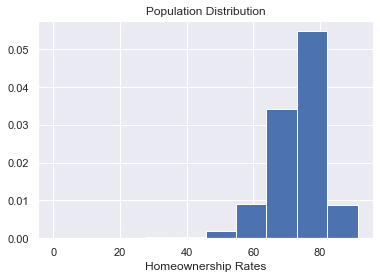

In [21]:
df['homeownership'].hist(density=True)
plt.title('Population Distribution')
plt.xlabel('Homeownership Rates')
plt.show()

### 2.b. Random Sample of County Homeownership Rates

#### 2.b.i. [1 pt] Collect a random sample of size 50 from this population (using a random state of 100) WITHOUT replacement.

In [22]:
df_sample=df.sample(50,replace=False,random_state=100)

#### 2.b.ii.  [0.5 pt]  Calculate the mean and standard deviation of this sample.

In [23]:
df_sample["homeownership"].mean()

74.97800000000001

In [24]:
df_sample["homeownership"].std()

5.516220607981371

#### 2.b.iii.  [0.5 pt]  Plot the sample distribution.

Make sure that you label the x-axis and title appropriately.

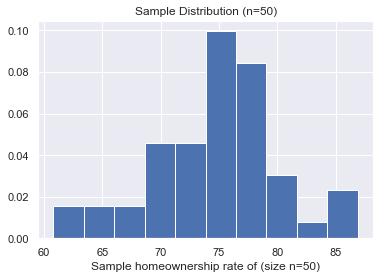

In [26]:
df_sample['homeownership'].hist(density=True)
plt.title('Sample Distribution (n=50)')
plt.xlabel('Sample homeownership rate of (size n=50)')
plt.show()

### 2.c. Sampling Distribution

Suppose we were to create a sampling distribution with many, many sample means homeownership rates, where each sample was of size 50 (drawn with replacement from the population of all county homeownership rates).

#### 2.c.i.  [1 pt]  What is the mean of this sampling distribution?

(Not looking for you to *actually* create a sampling distribution. What is the theoretical mean of this sampling distribution?)

73.2665

In [27]:
sample_dis_mean = df["homeownership"].mean()
sample_dis_mean

73.26645448758752

#### 2.c.ii.  [1 pt]  What is the standard deviation of this sampling distribution?

(Not looking for you to *actually* create a sampling distribution. What is the *theoretical* standard deviation of this sampling distribution?)

10.3614

In [32]:
sample_dis_std = df["homeownership"].std()/np.sqrt(50)
sample_dis_std

1.107602118713147

#### 2.c.iii.  [2 pt]  Will this sampling distribution of sample means be approximately normal? Explain why.

This sampling distribution of sample means will be approximately normal. This is because of the general rule of thumb indicating that samples of size 30 or greater will have a fairly normal distribution regardless of the shape of the distribution.

#### 2.c.iv.  [1 pt]  Calculate the probability that a randomly selected sample mean (from this sampling distribution) is greater than or equal to the sample mean that we calculated in (2.b). 

(You should assume in this case that you *do know* the population mean and standard deviation homeownership rates).

In [33]:
from scipy.stats import norm
1 - norm.cdf(df_sample["homeownership"].mean(),loc=sample_dis_mean , scale=sample_dis_std)

0.06114035488312297

#### 2.c.v.  [0.5 pt]  What is the value of a sample mean that is the same distance away from the population mean that our sample mean from 2b is, but is *less than* the population mean)?

df_sample["homeownership"].mean() - df["homeownership"].mean() = df["homeownership"].mean() - target_value = Distance

In [34]:
target_value = df["homeownership"].mean()- (df_sample["homeownership"].mean() - df["homeownership"].mean())

In [35]:
target_value

71.55490897517504

#### 2.c.vi.  [1 pt] Calculate the probability that a randomly selected sample mean (from this sampling distribution) is less than or equal to the sample mean that we calculated in (2.c.v.). 

In [36]:
norm.cdf(target_value, loc=sample_dis_mean , scale=sample_dis_std )

0.06114035488312293

## 3. Confidence Intervals for a Population Mean

While we technically have the population of all U.S. county homeownership rates (and can therefore calculate the population mean), we would still like to calculate a confidence interval to learn more about how confidence intervals behave. (By having a population, it allows us to "check" our answers to see how well our confidence intervals did.)

### 3.a. First, we would like to construct a *single* 92% confidence interval for the average homeownership rate of ALL U.S. counties.

#### 3.a.i.  [1 pt]  Check the conditions for creating a confidence interval for average homeownership rate of ALL U.S. counties.

1. The observations are normal (sample is collected via random sampling, n<10% of all U.S county homeownership rates)
2. The sample size > 30 

#### 3.a.ii.  [3 pt] Now create this 92% confidence interval using the random sample that you collected in 2b.

**ASSUME THAT YOU DO NOT KNOW WHAT THE POPULATION STANDARD DEVIATION HOMEOWNERSHIP RATE IS.**

In [41]:
sample_home_mean= df_sample["homeownership"].mean()
pop_home_std=df['homeownership'].std()
n_home = df_sample.shape[0]
from scipy.stats import norm
critical_value = norm.ppf(0.96)
critical_value

1.7506860712521692

In [40]:
lower_bound=sample_home_mean - critical_value*(pop_home_std/np.sqrt(n_home))
upper_bound=sample_home_mean + critical_value*(pop_home_std/np.sqrt(n_home))
print(lower_bound, "," ,upper_bound)

73.0389363982795 , 76.91706360172051


#### 3.a.iii.  [1 pt]  Now interpret this confidence interval.

we are 92% confident that the average homeownership rate of All U.S. counties is between 73.03 and 76.91

#### 3.a.iv.  [1 pt]  Because we *actually* know the population mean home ownership rate, check whether this population mean falls within this confidence interval you just calculated.

In [42]:
df['homeownership'].mean()

73.26645448758752

Yes, the population mean falled with confidence interval 

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### <u> Tutorial</u> ANDS and ORS in if-statements

We can check multiple conditions in an if-statement by using the 'and' and the 'or' operators as shown below.


In [1]:
a=20

if a < 30 and a>10:
    print('a is between 10 and 30')
else:
    print('otherwise')

a is between 10 and 30


In [2]:
if a >= 30 or a <=10:
    print('a is at most 10 or at least 30')
else:
    print('otherwise')

otherwise


<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 3.b. Next, let's construct 1000 92% confidence intervals for the average homeownership rate of ALL U.S. counties.

#### 3.b.i.  [2 pt] Create a function that does the following.
* <u>Input</u> The input for your function should take in the following values.
    - a lower bound of a confidence interval
    - an upper bound of a confidence interval
    - a population mean $\mu$
* <u>What it does</u>
    - Your function should check whether $lower \: bound\leq \mu\leq upper\: bound$.
    - If this is the case, it should return True
    - If this is not the case, then it should return False.

In [43]:
def confidence(lower, upper, popu_mean):
    if popu_mean >= lower and popu_mean <= upper:
        return True;
    else:
        return False


#### 3.b.ii.  [1 pt]  Test your function out using the population mean and the confidence interval from 3a.

In [44]:
confidence(lower_bound, upper_bound, df['homeownership'].mean())

True

#### 3.b.iii.  [2 pt]  Using your function above to do the following:
* Collect 1000 random samples (each of size 50 without replacement) from the population of all U.S. county homeownership rates.
* Calculate the sample mean homeownership rate and sample standard deviation of each of these random samples.
* Create a 92% confidence interval around each of these sample means (assume that you don't know the population standard deviation).

What percent of these 1000 confidence intervals *actually* contained the population mean homeownership rate?

In [46]:
count = 0
for i in range(1000):
    df_1000=df.sample(50,replace=False)
    sample_home_mean= df_1000["homeownership"].mean()
    sample_home_std=df_1000["homeownership"].std()
    pop_home_std=df['homeownership'].std()
    n_home = df_1000.shape[0]
    from scipy.stats import norm
    critical_value = norm.ppf(0.96)
    lower_bound=sample_home_mean - critical_value*(pop_home_std/np.sqrt(n_home))
    upper_bound=sample_home_mean + critical_value*(pop_home_std/np.sqrt(n_home))
    if confidence(lower_bound, upper_bound, df["homeownership"].mean()) == True:
        count = count + 1    
    

In [47]:
count/1000

0.922

#### 3.b.iv.  [0.5 pt]  What is the difference between this percentage from (3.b.iii) and your confidence level?

In [49]:
count/1000 - 0.92

0.0020000000000000018

## 4. More Probability

### 4a.  [0.5 pt]  What is the probability that we randomly select a county from the population that has a homeownership rate that is below 50%?

In [50]:
df_below50 = df[df["homeownership"]< 50]
df_below50.shape[0]/df.shape[0]

0.012412476129853597

### 4.b. *Suppose* were to collect a random sample of 7 counties from the population of U.S. counties (with replacement). 

Don't *actually* take a random sample. This is a *theoretical* math problem.

#### 4.b.i.  [1 pt] What is the probability that 2 of these counties have a homeownership rate that is below 50%?

In [51]:
below_rate = df_below50.shape[0]/df.shape[0]
below_rate * below_rate * (1-below_rate) * (1-below_rate) * (1-below_rate) * (1-below_rate) * (1-below_rate)

0.00014474208590927303

#### 4.b.ii.  [1 pt]  What is the probability that at most 2 counties have a homeownership rate that is below 50%?

In [52]:
rate_0 = (1- below_rate) * (1- below_rate) * (1-below_rate) * (1-below_rate) * (1-below_rate) * (1-below_rate) * (1-below_rate)
rate_1 = below_rate * (1-below_rate) * (1-below_rate) * (1-below_rate) * (1-below_rate) * (1-below_rate) * (1-below_rate)
rate_2 = below_rate * below_rate * (1-below_rate) * (1-below_rate) * (1-below_rate) * (1-below_rate) * (1-below_rate)
total_rate = rate_0 + rate_1 + rate_2
total_rate

0.9279430353635436